In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import os
import datetime
import pandas as pd
import timeit

In [2]:
'''Micol'''
path_raw = '/Users/micol/Documents/Imperial/Year4/Master_Project/polypropelene' #path with raw spectra files

'''Rachel'''
#path_raw = 'D:/raw_spectra' #path containing all raw spectra
#path_log = 'D:/MSci_Full' #path containing full_log

full_log = 'poly_window_test1-20181218110622.log' #contains temperature and status of h/c BB target

In [3]:
all_the_files = np.array([i for i in os.listdir(path_raw) if os.path.isfile(os.path.join(path_raw,i)) and i.startswith('IC_raw_spectra_')]) #all files in directory starting with 'IC_raw_spectra'

def read_temperatures_check(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    temp1 = [float(b) for b in (lines[1].split())[6:]]
    tempHBB1 = temp1[0]
    return tempHBB1

delete_files = [f for f in all_the_files if read_temperatures_check(path_raw,f)==0.0] #files where there is no temperature measurement
file_array = [f.strip('IC_raw_spectra.tx') for f in all_the_files if f not in delete_files] #numbers of allowed file lists, in wrong order
file_integers = sorted([int(i) for i in file_array]) #number converted to sorted integers (not naturally done)

files_list = ['IC_raw_spectra_'+str(num)+'.txt' for num in file_integers] #final file list in order

In [4]:
"""retrieving times from files"""

def read_times(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    times = lines[0].split() #retrieve times of beginning of all spectra in a file
    return times

In [5]:
all_times_list = [] #final time list [374x4] (in HH:MM:SS.microsec format)

for f in range(len(files_list)): #go through files_list and extract times
    all_times_list.append(read_times(path_raw, files_list[f]))

flat_list = [item for sublist in all_times_list for item in sublist] #1D list of all times (in HH:MM:SS.microsec format)

spectrum_times = [] #final time list [(374*4)x1] in seconds from midnight format

for i in flat_list: #convert times to seconds format
    time = datetime.datetime.strptime(i, '%H:%M:%S.%f')
    spectrum_times.append((time.microsecond)/1000000 +time.second+time.minute*60+time.hour*3600)

Code up to this point returns: #edit

$\textbf{spectrum_times}$: a list of times of all spectra for which the temperature is not zero

$\textbf{files_list}$: a list of all raw files for which temperature is not zero

In [6]:
time_col_name = 'Time' # name the time column in all subsequent dataframes

In [7]:
def read_file(directory, filename, separator, head='infer'):
    """
    Reads an external file and outputs it as a Pandas Dataframe
    Input: Directory, Filename (Strings)
    Output: Pandas Dataframe
    """
    path=os.path.join(directory, filename)
    dataset = pd.read_csv(path, header = head, sep=separator)
    
    return dataset

In [8]:
# LOG FILE
# Importing file X with features Y Z
x = read_file(path_raw, full_log, separator=',', head=None)

y = x[[1,6,8,9,10,11]] # picking out relevant features

zz = y.loc[y[11] != 0] # removing zero-valued entries in column 11, the ones where it wasnt looking at hot or cold BB

log_file = zz.reset_index()

log_file.columns = ['a','Real Time', 'room_temp', 'hbb_temp','cbb_temp','Time','orientation'] #all the column names; 'f' is some value (0,225,270)
log_file['hc'] = np.nan #add empty column 'hc'
#log_file['temp_avg'] = np.nan #add empty column 'temp_avg'

log_file.loc[log_file['orientation'] == 270, 'hc'] = 'h' #if f=270, 'h'
log_file.loc[log_file['orientation'] == 225, 'hc'] = 'c'
#zz2.loc[zz2['hc'] == 'h', 'temp_avg'] == zz2.loc['hbb_temp']

log_file.drop('a', axis=1, inplace=True)

#log_file.loc[100, 'orientation']

In [9]:
log_file[80:]

,Real Time,room_temp,hbb_temp,cbb_temp,Time,orientation,hc
80,11:10:00,21.38,69.52,23.97,40201,225,c
81,11:10:03,21.39,69.52,23.98,40203,225,c
82,11:10:05,21.38,69.52,23.99,40205,225,c
83,11:10:07,21.38,69.52,23.99,40207,225,c
84,11:10:09,21.39,69.52,23.99,40209,225,c
85,11:10:11,21.38,69.52,23.99,40211,225,c
86,11:10:13,21.38,69.52,24.00,40213,225,c
87,11:10:15,21.38,69.52,24.00,40215,225,c
88,11:10:17,21.38,69.51,24.00,40218,225,c
89,11:10:19,21.39,69.52,24.01,40220,225,c


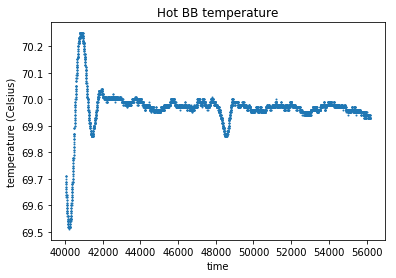

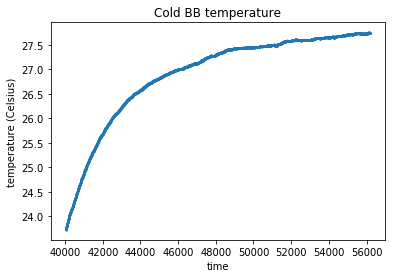

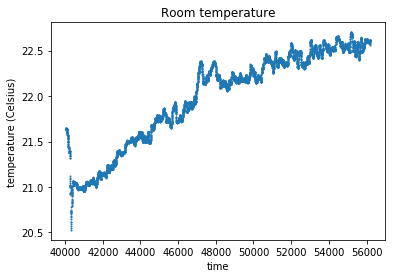

In [10]:
plt.scatter(log_file['Time'], log_file['hbb_temp'], s=1)
plt.title('Hot BB temperature')
plt.xlabel('time')
plt.ylabel('temperature (Celsius)')
plt.show()
plt.scatter(log_file['Time'], log_file['cbb_temp'], s=1)
plt.title('Cold BB temperature')
plt.xlabel('time')
plt.ylabel('temperature (Celsius)')
plt.show()
plt.scatter(log_file['Time'], log_file['room_temp'], s=1)
plt.title('Room temperature')
plt.xlabel('time')
plt.ylabel('temperature (Celsius)')
plt.show()

In [11]:
'''insert_row inserts a row into a dataframe after a given index and then reindex all rows in ascending order'''

def insert_row(i, df, line):
    dfA = df.iloc[:i, ]
    dfB = df.iloc[i:, ]
    df = dfA.append(line).append(dfB).reset_index(drop = True) # Our code differs here
    return df

In [12]:
times_all = [i for i in spectrum_times] # select times when reading is stable
times = times_all[-3:1:-4] #only want every fourth spectrum
times.sort(reverse = True) #need to insert rows into dataframe in reverse order in order not to get messed up with indices

In [13]:
#scan log_times, and insert spectra at corresponding times, with 'Nan' in the h_c column (by default)
log_times = log_file['Time']

for t in times:
    i=0
    if t > log_times[0]:
        while log_file.at[i, time_col_name] <= t:
            i += 1   
        line = pd.DataFrame([t], columns = [time_col_name])
        log_file = insert_row(i, log_file, line)
    else:
        line = pd.DataFrame([t], columns = [time_col_name])
        log_file = insert_row(i, log_file, line)

In [14]:
log_file[6700:]

,Real Time,Time,cbb_temp,hbb_temp,hc,orientation,room_temp
6700,14:49:56,53396.000,27.64,69.96,c,225.0,22.44
6701,14:49:58,53398.000,27.64,69.95,c,225.0,22.45
6702,14:50:00,53400.000,27.64,69.95,c,225.0,22.45
6703,14:50:02,53402.000,27.64,69.95,c,225.0,22.44
6704,NaN,53403.139,NaN,NaN,NaN,NaN,NaN
6705,14:50:04,53404.000,27.64,69.95,c,225.0,22.45
6706,14:50:06,53406.000,27.64,69.95,c,225.0,22.44
6707,14:50:08,53409.000,27.64,69.95,c,225.0,22.44
6708,14:50:10,53411.000,27.64,69.95,c,225.0,22.44
6709,14:50:12,53413.000,27.64,69.96,c,225.0,22.43


In [19]:
print(len(log_file))

8104


In [29]:
hc_list = []
temps_avg = []
temps_std = []

for i in range(len(log_file)-50): # WHY DOES THIS NOT WORK WITHOUT -50!???
    value = log_file.at[i, 'hc']
    if value != 'c' and value != 'h':
       # print('i'+str(i))
        hot_or_cold = log_file.iloc[i+1]['hc']
        hc_list.append(hot_or_cold) # the spectra are assigned the h_c value of the following time
        temp_list = []
        a=2
        if hot_or_cold == 'h':
            num = log_file.iloc[i+1]['hbb_temp']
           # print('h' + str(num))
           # print(m.isnan(num))
            while m.isnan(num) == False:
                temp_list.append(num)
                num = log_file.iloc[i+a]['hbb_temp']
                a += 1
           # print(temp_list)
            temps_avg.append(np.average(temp_list))
            temps_std.append(np.std(temp_list))
        elif hot_or_cold == 'c':
            num = log_file.iloc[i+1]['cbb_temp']
           # print('c' + str(num))
           # print(m.isnan(num))
            while m.isnan(num) == False:
                temp_list.append(num)
                num = log_file.iloc[i+a]['cbb_temp']
                a += 1
            temps_avg.append(np.average(temp_list))
            temps_std.append(np.std(temp_list))
            #print(temp_list)

In [30]:
print(len(times))
print(len(hc_list))
print(len(temps_avg))
print(len(temps_std))

272
271
271
271


In [31]:
times.sort() # now they are back in ascending order

final_frame_4 = pd.DataFrame(
    {'Time': times[:-1],
     'h_or_c': hc_list,
     'temp_avg': temps_avg,
     'temp_std': temps_std
    })

final_frame_4

,Time,h_or_c,temp_avg,temp_std
0,40111.019,h,69.550357,1.523205e-02
1,40169.609,c,23.973214,2.646474e-02
2,40227.415,c,24.056897,1.783129e-02
3,40287.544,h,69.574483,2.237397e-02
4,40346.925,h,69.661724,2.547060e-02
5,40405.524,c,24.236429,2.207362e-02
6,40463.332,c,24.310345,2.428037e-02
7,40523.501,h,70.003214,2.778149e-02
8,40581.405,h,70.095185,2.409401e-02
9,40641.010,c,24.522857,2.249717e-02


In [32]:
h = 6.626e-34
c = 3.0e+8
k = 1.381e-23

planck_a = 2*h*(c**2)
planck_e = h*c/k

def planck(wavenumber, T): # T in Kelvin, wavenumber in cm^-1
    radiance = 100*planck_a*((wavenumber*100)**3)/(np.exp(planck_e*(wavenumber*100)/T)-1)
    return radiance #returns radiance in $W m^{-2} sr^{-1} (cm^{-1})^{-1}$

In [33]:
def read_wavenumbers(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    wns = []
    for i in lines[5:]:
        line = i.split()
        split_lines = [float(a) for a in line]
        wns.append(split_lines[0])
    return wns

raw_wavenumbers = read_wavenumbers(path_raw, files_list[0]) #all wavenumbers are the same in all files so just need to read from the first file
wavenums = raw_wavenumbers

In [34]:
def read_all_raw_spectra(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list

    sp1 = []
    sp2 = []
    sp3 = []
    sp4 = []
    
    for i in lines[5:]:
        line = i.split()
        split_lines = [float(a) for a in line]
        sp1.append(split_lines[1])
        sp2.append(split_lines[2])
        sp3.append(split_lines[3])
        sp4.append(split_lines[4])
    avg_4_spec = 0.25*(np.array(sp1) + np.array(sp2) + np.array(sp3) + np.array(sp4))
    
    return avg_4_spec #list of raw value as function of wavenumber averaged over the 4 spectra

average_all_4_spectra = [read_all_raw_spectra(path_raw, files_list[f]) for f in range(len(files_list)-1)] #list of 352 elements, which is a list of 8000 points averaged over the 4 spectra
average_4_spectra = average_all_4_spectra

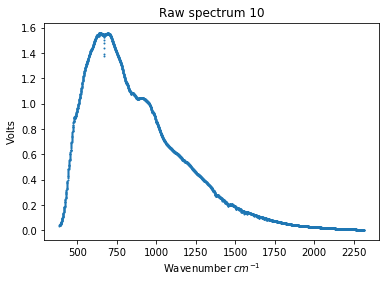

In [35]:
# Plot a raw spectrum
def raw_spectrum_plot(num): #num = the spectrum you want to plot (0 to 352)
    plt.scatter(wavenums, average_4_spectra[num], s=1)
    plt.title('Raw spectrum ' + str(num))
    plt.xlabel('Wavenumber $cm^{-1}$')
    plt.ylabel('Volts')
    plt.show()

raw_spectrum_plot(10)

In [36]:
def response_fn(spectrum_number): #returns the response function at some time and wavenumber
    
    (a,b) = (average_4_spectra[spectrum_number], average_4_spectra[spectrum_number + 1])
    if a[1000] < b[1000]:
        V_c = a
        V_h = b
    else:
        V_c = b
        V_h = a

    V_diff = np.array(V_h)-np.array(V_c)
    
    (e,f) = (final_frame_4.at[spectrum_number,'temp_avg'], final_frame_4.at[spectrum_number+1,'temp_avg'])
    if e<f:
        temp_average_c = e
        temp_average_h = f
    else:
        temp_average_c = f
        temp_average_h = e
    
    radiances_avg_h = [planck(wn, temp_average_h+273.15) for wn in wavenums]
    radiances_avg_c = [planck(wn, temp_average_c+273.15) for wn in wavenums]
    rad_diff = np.array(radiances_avg_h) - np.array(radiances_avg_c)
    
    def division(raw_val,planck_val):
        return raw_val/planck_val
    
    division_vec = np.vectorize(division)
    ratio = division_vec(V_diff, rad_diff)
    
    return(ratio)

In [37]:
indices = np.arange(0, 270, 2)     #array of every other (odd) index, starting at n=1, cold
print(indices)
all_resp_functions = [response_fn(i) for i in indices]  #list of arrays of response functions available to plot, list length=175, array lengths=4001

diff_resp_functions = [i - all_resp_functions[-1] for i in np.array(all_resp_functions)]

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250
 252 254 256 258 260 262 264 266 268]


In [38]:
print(len(wavenums))
print(len(times[:-2:2]))
print(len(all_resp_functions))

4001
135
135


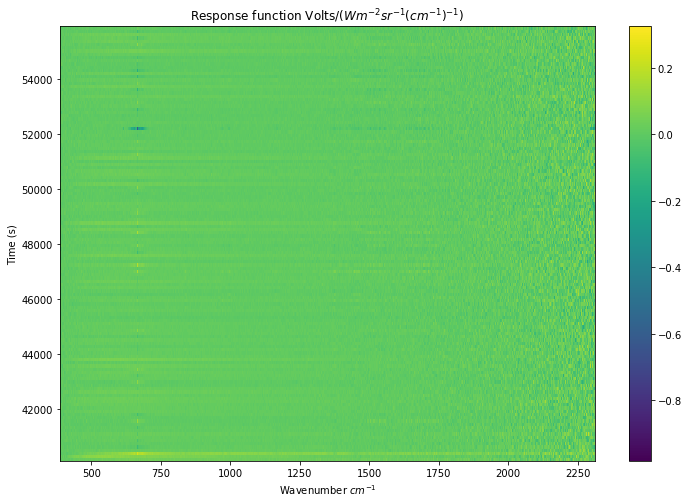

In [39]:
fig, ax = plt.subplots(figsize=(12,8))

p = ax.pcolor(wavenums, times[:-2:2], all_resp_functions)
cb = fig.colorbar(p)
plt.title('Response function Volts/($W m^{-2} sr^{-1} (cm^{-1})^{-1}$)')
plt.xlabel('Wavenumber $cm^{-1}$')
plt.ylabel('Time (s)')
plt.show()